<a href="https://colab.research.google.com/github/animesh-11/AI_ML/blob/main/EDA_Assg_NYC_Taxi_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Install the recommended numpy version
#!pip install numpy==1.26.4

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("plotly version:", plotly.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
plotly version: 5.24.1


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os
import pandas as pd # Ensure pandas is imported

# The path to the data directory based on the latest kernel state
data_dir = '/content/drive/MyDrive/IIITB/EDA_Assignment/Datasets_Dictionary/trip_records'

# Check if the data directory exists
if not os.path.exists(data_dir):
    print(f"Error: Data directory not found at {data_dir}.")
    print("Please ensure your Google Drive is mounted and the 'trip_records' folder is correctly placed.")
    raise FileNotFoundError(f"Data directory '{data_dir}' not found. Cannot proceed without the data files.")

# Change the working directory to where the data files are located
os.chdir(data_dir)
print(f"Successfully changed working directory to: {os.getcwd()}")

# Create a list of all the twelve 2023 parquet files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet') and f.startswith('2023-')]
file_list.sort() # Ensure consistent order for processing
print(f"Files to process: {file_list}")

# initialise an empty dataframe to store all sampled data for the entire year
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Processing file: {file_name}")
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current month's parquet file
        current_month_df = pd.read_parquet(file_path)

        # Convert tpep_pickup_datetime to datetime objects for easy extraction of date and hour
        current_month_df['tpep_pickup_datetime'] = pd.to_datetime(current_month_df['tpep_pickup_datetime'])

        # Add the new columns for date and hour to the current month's DataFrame before sampling
        current_month_df['pickup_date'] = current_month_df['tpep_pickup_datetime'].dt.date
        current_month_df['pickup_hour'] = current_month_df['tpep_pickup_datetime'].dt.hour

        # Initialise an empty DataFrame to store sampled data for the current month
        sampled_data = pd.DataFrame()

        # Get unique dates in the current month's data
        unique_dates = current_month_df['pickup_date'].unique()

        # Loop through each unique date
        for date in unique_dates:
            daily_data = current_month_df[current_month_df['pickup_date'] == date]
            # Loop through every hour of the selected date (0 to 23)
            for hour in range(24):
                hour_data = daily_data[daily_data['pickup_hour'] == hour]

                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly with a fixed random_state for reproducibility
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    # Add the sampled data for this hour to the monthly sampled_data DataFrame
                    sampled_data = pd.concat([sampled_data, sample])

        # After processing all dates and hours for the current month, concatenate its sampled_data to the overall 'df'
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# Reset the index of the final combined DataFrame for a clean index
df = df.reset_index(drop=True)

print(f"\nTotal sampled rows across all months: {len(df)}")
print("\nFirst 5 rows of the combined sampled DataFrame:")
print(df.head())
print("\nInfo of the combined sampled DataFrame:")
df.info()

# Save the final combined DataFrame to a parquet file as requested for direct use later
output_file_path = '/content/sampled_nyc_taxi_2023.parquet'
df.to_parquet(output_file_path)
print(f"\nSampled and combined data saved to {output_file_path}")

Successfully changed working directory to: /content/drive/MyDrive/IIITB/EDA_Assignment/Datasets_Dictionary/trip_records
Files to process: ['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet']
Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet

Total sampled rows across all months: 1896400

First 5 rows of the combined sampled DataFrame:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1        

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [12]:
# Store the df in csv/parquet
# df.to_parquet('')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file
df = pd.read_parquet('/content/sampled_nyc_taxi_2023.parquet')


In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [7]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop=True)
df = df.drop(columns=['pickup_date', 'pickup_hour'])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [8]:
# Combine the two airport fee columns

#Missing values in 'airport_fee'
print(df['airport_fee'].isnull().sum())
#Missing values in 'Airport_fee'
print(df['Airport_fee'].isnull().sum())
#Describing both columns
df['airport_fee'].describe()
df['Airport_fee'].describe()

# Check how many rows have non-null values in both columns simultaneously.
common_non_null = df[['airport_fee', 'Airport_fee']].dropna().shape[0]
print(f"\nNumber of rows with non-null values in both 'airport_fee' and 'Airport_fee': {common_non_null}")

#Filling NaN in 'airport_fee' with values from 'Airport_fee'.
# Then drop the 'Airport_fee' column.

df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])

# Drop the 'Airport_fee' column as it's now merged into 'airport_fee'
df = df.drop(columns=['Airport_fee'])

print("\nAfter combining and dropping 'Airport_fee' column:")
print(df['airport_fee'].isnull().sum())
print(df[['airport_fee']].head())

1747917
213357

Number of rows with non-null values in both 'airport_fee' and 'Airport_fee': 0

After combining and dropping 'Airport_fee' column:
64874
   airport_fee
0         1.25
1         0.00
2         0.00
3         0.00
4          NaN


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [9]:
# check where values of fare amount are negative
negative_fare_amount_trips = df[df['fare_amount'] < 0]
print(f"Number of trips with negative fare amount: {len(negative_fare_amount_trips)}")
print(negative_fare_amount_trips)

Number of trips with negative fare amount: 0
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [12]:
# Analyse RatecodeID for the negative fare amounts

# As confirmed in the previous step (cell nBsMT2MII1Hv), there are no trips with negative fare_amount.
# Therefore, there is no data to analyze RatecodeID for in this context.


In [10]:
# Find which columns have negative values

monetary_columns = [
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]

negative_values_found = False
for col in monetary_columns:
    negative_count = df[df[col] < 0][col].count()
    if negative_count > 0:
        negative_values_found = True
        print(f"Column '{col}' has {negative_count} negative values.")
        print("\n")

if not negative_values_found:
    print("No negative values found in any of the monetary columns.")

Column 'extra' has 3 negative values.


Column 'mta_tax' has 73 negative values.


Column 'improvement_surcharge' has 78 negative values.


Column 'total_amount' has 78 negative values.


Column 'congestion_surcharge' has 56 negative values.


Column 'airport_fee' has 15 negative values.




In [50]:
monetary_columns = [
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]

for col in monetary_columns:
    # Calculate counts for each condition
    pos_count = (df[col] > 0).sum()
    neg_count = (df[col] < 0).sum()
    zero_count = (df[col] == 0).sum()
    nan_count = df[col].isna().sum() # Optional: check for missing values

    # Print the summary for the current column
    print(f"Summary for column: {col}")
    print(f"  Positive (> 0): {pos_count}")
    print(f"  Negative (< 0): {neg_count}")
    print(f"  Zero (= 0):     {zero_count}")
    if nan_count > 0:
        print(f"  Missing (NaN):  {nan_count}")
    print("-" * 30)

Summary for column: fare_amount
  Positive (> 0): 1830816
  Negative (< 0): 0
  Zero (= 0):     575
------------------------------
Summary for column: extra
  Positive (> 0): 1134412
  Negative (< 0): 0
  Zero (= 0):     696979
------------------------------
Summary for column: mta_tax
  Positive (> 0): 1814302
  Negative (< 0): 0
  Zero (= 0):     17089
------------------------------
Summary for column: tip_amount
  Positive (> 0): 1421157
  Negative (< 0): 0
  Zero (= 0):     410234
------------------------------
Summary for column: tolls_amount
  Positive (> 0): 148643
  Negative (< 0): 0
  Zero (= 0):     1682748
------------------------------
Summary for column: improvement_surcharge
  Positive (> 0): 1830654
  Negative (< 0): 0
  Zero (= 0):     737
------------------------------
Summary for column: total_amount
  Positive (> 0): 1831062
  Negative (< 0): 0
  Zero (= 0):     329
------------------------------
Summary for column: congestion_surcharge
  Positive (> 0): 1690549
  Ne

In [12]:
# fix these negative values

monetary_columns = [
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]

for col in monetary_columns:
    # Replace negative values with 0
    df.loc[df[col] < 0, col] = 0
    print(f"Negative values in '{col}' replaced with 0. New count of negative values: {df[df[col] < 0][col].count()}")



Negative values in 'extra' replaced with 0. New count of negative values: 0
Negative values in 'mta_tax' replaced with 0. New count of negative values: 0
Negative values in 'tip_amount' replaced with 0. New count of negative values: 0
Negative values in 'tolls_amount' replaced with 0. New count of negative values: 0
Negative values in 'improvement_surcharge' replaced with 0. New count of negative values: 0
Negative values in 'total_amount' replaced with 0. New count of negative values: 0
Negative values in 'congestion_surcharge' replaced with 0. New count of negative values: 0
Negative values in 'airport_fee' replaced with 0. New count of negative values: 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [14]:
# Find the proportion of missing values in each column

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("Proportion of missing values in each column:")
print(missing_info.sort_values(by='Missing Percentage', ascending=False))

Proportion of missing values in each column:
                       Missing Count  Missing Percentage
airport_fee                    64874            3.420903
congestion_surcharge           64874            3.420903
passenger_count                64874            3.420903
RatecodeID                     64874            3.420903
store_and_fwd_flag             64874            3.420903
extra                              0            0.000000
total_amount                       0            0.000000
improvement_surcharge              0            0.000000
tolls_amount                       0            0.000000
tip_amount                         0            0.000000
mta_tax                            0            0.000000
VendorID                           0            0.000000
fare_amount                        0            0.000000
tpep_pickup_datetime               0            0.000000
DOLocationID                       0            0.000000
PULocationID                       0       

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [15]:
# Display the rows with null values
print("Rows with null values in 'passenger_count': ")
print(df[df['passenger_count'].isnull()])


print("\nValue counts for 'passenger_count':")
print(df['passenger_count'].value_counts(dropna=False))

# Impute missing passenger_count with the most frequent value (mode) or 1 as a sensible default.

mode_passenger_count = df['passenger_count'].mode()[0]
df['passenger_count'].fillna(mode_passenger_count, inplace=True)

print(f"\nMissing values in 'passenger_count' imputed with: {mode_passenger_count}")
print("\nValue counts for 'passenger_count' after imputation:")
print(df['passenger_count'].value_counts(dropna=False))
print("\nNumber of null values in 'passenger_count' after imputation:", df['passenger_count'].isnull().sum())

Rows with null values in 'passenger_count': 
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              NaN   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              NaN   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              NaN   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              NaN   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46    

/tmp/ipython-input-966343329.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(mode_passenger_count, inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [16]:
# Fix missing values in 'RatecodeID'

print("Value counts for 'RatecodeID' before imputation:")
print(df['RatecodeID'].value_counts(dropna=False))

# Impute missing RatecodeID with the most frequent value (mode)
mode_ratecode_id = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecode_id, inplace=True)

print("\nValue counts for 'RatecodeID' after imputation:")
print(df['RatecodeID'].value_counts(dropna=False))
print("\nNumber of null values in 'RatecodeID' after imputation:", df['RatecodeID'].isnull().sum())

Value counts for 'RatecodeID' before imputation:
RatecodeID
1.0     1729259
2.0       71670
NaN       64874
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

Value counts for 'RatecodeID' after imputation:
RatecodeID
1.0     1794133
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

Number of null values in 'RatecodeID' after imputation: 0


/tmp/ipython-input-1551710006.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(mode_ratecode_id, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [17]:
# handle null values in congestion_surcharge

print("Number of null values in 'congestion_surcharge' before imputation:", df['congestion_surcharge'].isnull().sum())

# Impute missing 'congestion_surcharge' with 0, assuming NaN means no surcharge was applied.
df['congestion_surcharge'].fillna(0, inplace=True)

print("Number of null values in 'congestion_surcharge' after imputation:", df['congestion_surcharge'].isnull().sum())
print("Value counts for 'congestion_surcharge' after imputation:\n", df['congestion_surcharge'].value_counts(dropna=False))

Number of null values in 'congestion_surcharge' before imputation: 64874
Number of null values in 'congestion_surcharge' after imputation: 0
Value counts for 'congestion_surcharge' after imputation:
 congestion_surcharge
2.5    1690572
0.0     205827
0.5          1
Name: count, dtype: int64


/tmp/ipython-input-292727545.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [18]:
# Handle any remaining missing values

# Re-check missing values.
print(df.isnull().sum()[df.isnull().sum() > 0])

# Impute missing values in 'airport_fee' with 0
df['airport_fee'].fillna(0, inplace=True)
print("\nMissing values in 'airport_fee' after imputation:", df['airport_fee'].isnull().sum())

# Impute missing values in 'store_and_fwd_flag' with the mode
mode_store_and_fwd_flag = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'].fillna(mode_store_and_fwd_flag, inplace=True)
print("Missing values in 'store_and_fwd_flag' after imputation:", df['store_and_fwd_flag'].isnull().sum())


store_and_fwd_flag    64874
airport_fee           64874
dtype: int64

Missing values in 'airport_fee' after imputation: 0


/tmp/ipython-input-3260260365.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['airport_fee'].fillna(0, inplace=True)
/tmp/ipython-input-3260260365.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Missing values in 'store_and_fwd_flag' after imputation: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [19]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print("Statistical summary of the DataFrame:\n")
print(df.describe(include='all'))
print("\nInformation about data types and non-null values:\n")
df.info()

Statistical summary of the DataFrame:

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   1.896400e+06                     1896400                     1896400   
unique           NaN                         NaN                         NaN   
top              NaN                         NaN                         NaN   
freq             NaN                         NaN                         NaN   
mean    1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min     1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%     1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%     2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%     2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max     6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std     4.476401e-01                         NaN                         NaN   



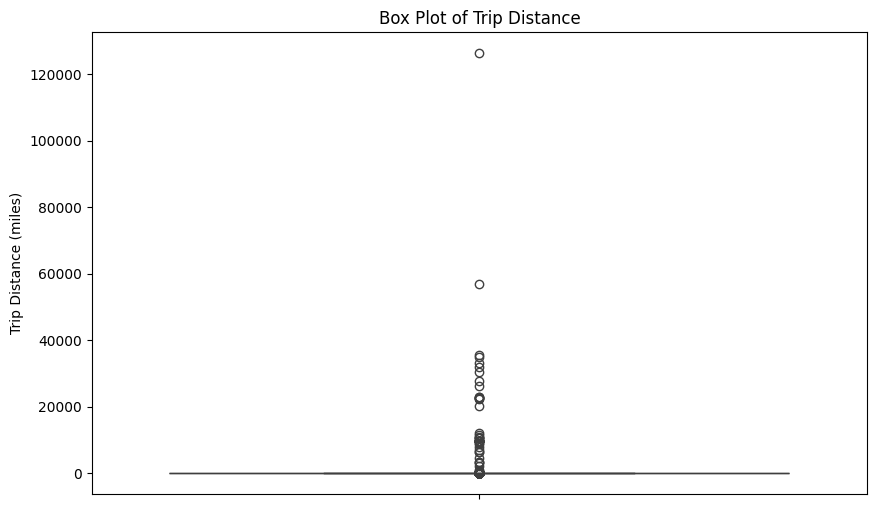

In [20]:
# Visualize outliers in 'trip_distance'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['trip_distance'])
plt.title('Box Plot of Trip Distance')
plt.ylabel('Trip Distance (miles)')
plt.show()

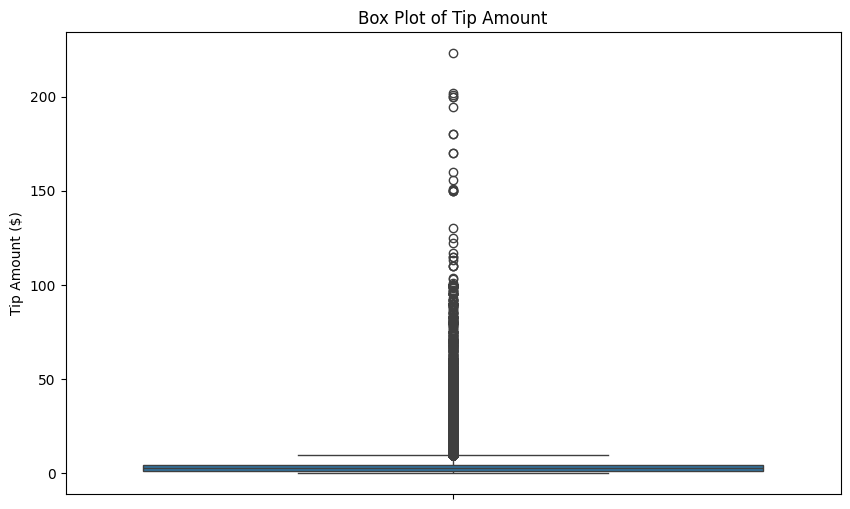

In [21]:
# Visualize outliers in 'tip_amount'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['tip_amount'])
plt.title('Box Plot of Tip Amount')
plt.ylabel('Tip Amount ($)')
plt.show()

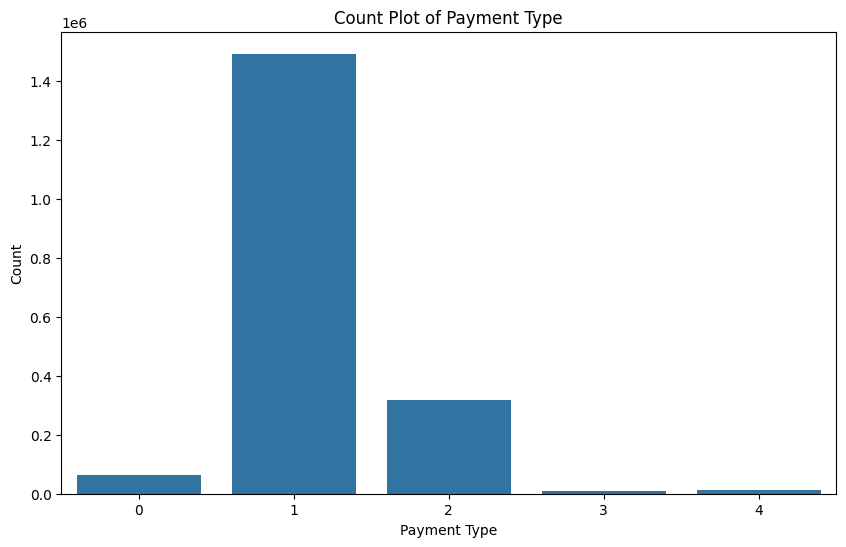

In [22]:
# Visualize distribution of 'payment_type' to check for unusual categories/counts
plt.figure(figsize=(10, 6))
sns.countplot(x=df['payment_type'])
plt.title('Count Plot of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [23]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [35]:
# Continue with outlier handling

initial_rows = len(df)

# trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]


# trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]


# trip_distance is more than 250 miles.
df = df[df['trip_distance'] <= 250]


# payment_type is 0 (undefined in data dictionary)
df = df[df['payment_type'] != 0]



print(df[['trip_distance', 'fare_amount', 'payment_type', 'passenger_count']].describe())
print(len(df))

       trip_distance   fare_amount  payment_type  passenger_count
count   1.831391e+06  1.831391e+06  1.831391e+06     1.831391e+06
mean    3.444838e+00  1.981667e+01  1.205003e+00     1.369145e+00
std     4.545772e+00  1.073392e+02  4.664804e-01     8.924778e-01
min     0.000000e+00  0.000000e+00  1.000000e+00     0.000000e+00
25%     1.050000e+00  9.300000e+00  1.000000e+00     1.000000e+00
50%     1.780000e+00  1.350000e+01  1.000000e+00     1.000000e+00
75%     3.370000e+00  2.190000e+01  1.000000e+00     1.000000e+00
max     2.048600e+02  1.431635e+05  4.000000e+00     6.000000e+00
1831391


In [46]:
# Do any columns need standardising?

cols_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols_to_scale:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

#print(df['tolls_amount'].max())


#print(df[columns_to_standardize].head())

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [51]:

df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

**The categorization of the variables are as mention below:**

VendorID: Categorical (represents distinct providers)

tpep_pickup_datetime: Temporal / Numerical (can be used for time-series analysis or converted to numerical representations)

tpep_dropoff_datetime: Temporal / Numerical

passenger_count: Numerical (discrete, count of passengers)

trip_distance: Numerical (continuous, distance in miles)

RatecodeID: Categorical (represents distinct rate types)

PULocationID: Categorical (represents distinct geographical zones)

DOLocationID: Categorical (represents distinct geographical zones)

payment_type: Categorical (represents distinct payment methods)

pickup_hour: Numerical (discrete, hour of the day)

trip_duration: Numerical (continuous, derived from datetime, often in minutes/seconds)

The following monetary parameters are all Numerical (continuous values):

fare_amount

extra

mta_tax

tip_amount

tolls_amount

improvement_surcharge

total_amount

congestion_surcharge

airport_fee

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

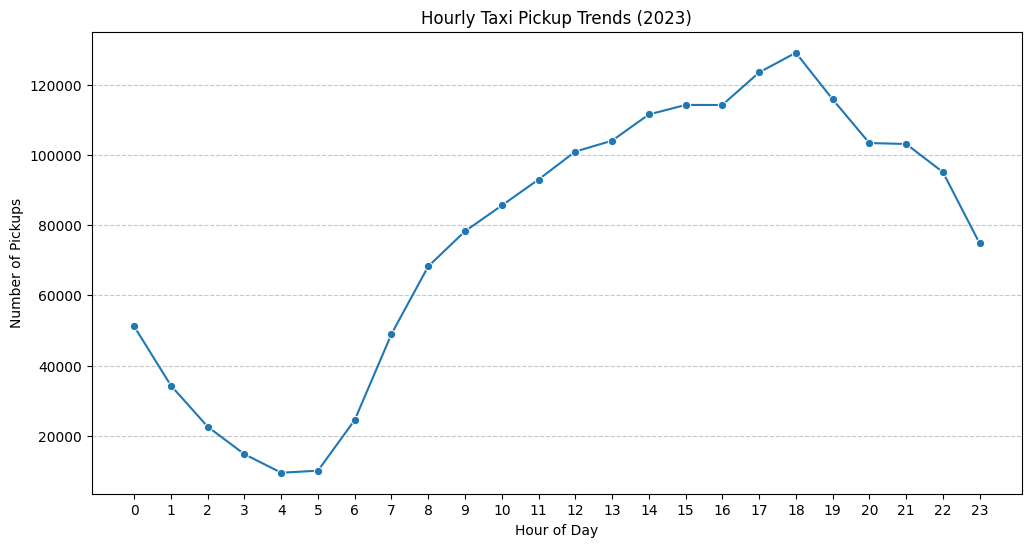

In [52]:
# Find and show the hourly trends in taxi pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


hourly_pickups = df['pickup_hour'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o')
plt.title('Hourly Taxi Pickup Trends (2023)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

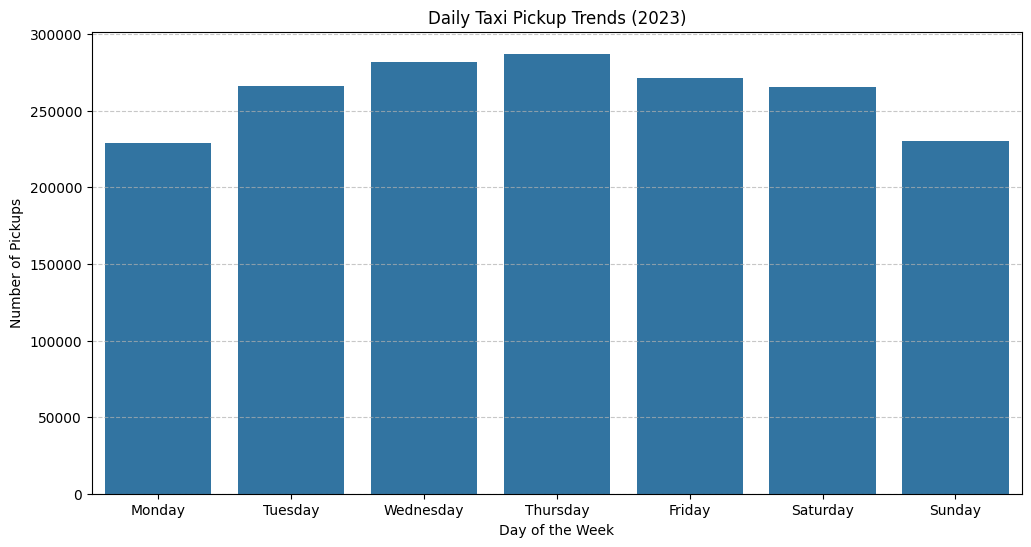

In [53]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day_name'] = df['pickup_dayofweek'].map(lambda x: day_names[x])

daily_pickups = df['pickup_day_name'].value_counts().reindex(day_names)

# Visualize the daily trends
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values)
plt.title('Daily Taxi Pickup Trends (2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

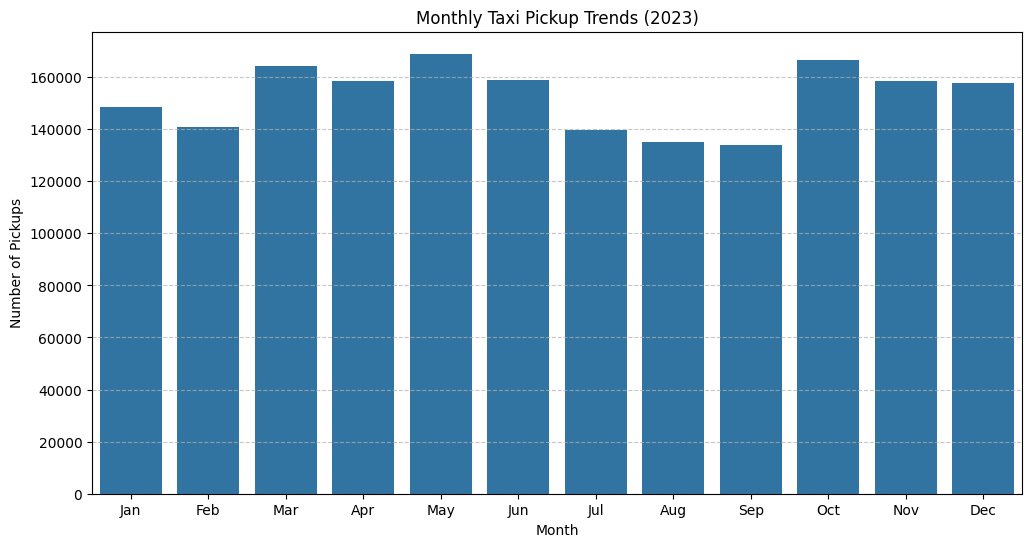

In [54]:
# Show the monthly trends in pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

monthly_pickups = df['pickup_month'].value_counts().sort_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_pickups.index = monthly_pickups.index.map(lambda x: month_names[x-1])

# Visualize the monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.title('Monthly Taxi Pickup Trends (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [55]:
# Analyse the above parameters, showing zero and negative value counts

financial_and_distance_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

print("Analysis of financial parameters and trip distance:\n")
for col in financial_and_distance_cols:
    print(f"Column: {col}")
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"  Number of zero values: {zero_count}")
    print(f"  Percentage of zero values: {(zero_count / len(df)) * 100:.2f}%")
    print(f"  Number of negative values: {negative_count}")
    print(f"  Percentage of negative values: {(negative_count / len(df)) * 100:.2f}%\n")


Analysis of financial parameters and trip distance:

Column: fare_amount
  Number of zero values: 575
  Percentage of zero values: 0.03%
  Number of negative values: 0
  Percentage of negative values: 0.00%

Column: tip_amount
  Number of zero values: 410234
  Percentage of zero values: 22.40%
  Number of negative values: 0
  Percentage of negative values: 0.00%

Column: total_amount
  Number of zero values: 329
  Percentage of zero values: 0.02%
  Number of negative values: 0
  Percentage of negative values: 0.00%

Column: trip_distance
  Number of zero values: 22928
  Percentage of zero values: 1.25%
  Number of negative values: 0
  Percentage of negative values: 0.00%



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [56]:
# Create a df with non zero entries for the selected parameters.
filtered_df = df.copy()

filtered_df = filtered_df[
    (filtered_df['fare_amount'] != 0) &
    (filtered_df['tip_amount'] != 0) &
    (filtered_df['total_amount'] != 0) &
    (filtered_df['trip_distance'] != 0)
]
print(f"Original shape: {df.shape}")
print(f"Filtered shape: {filtered_df.shape}")



Original shape: (1831391, 23)
Filtered shape: (1412905, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Monthly Revenue Trend :



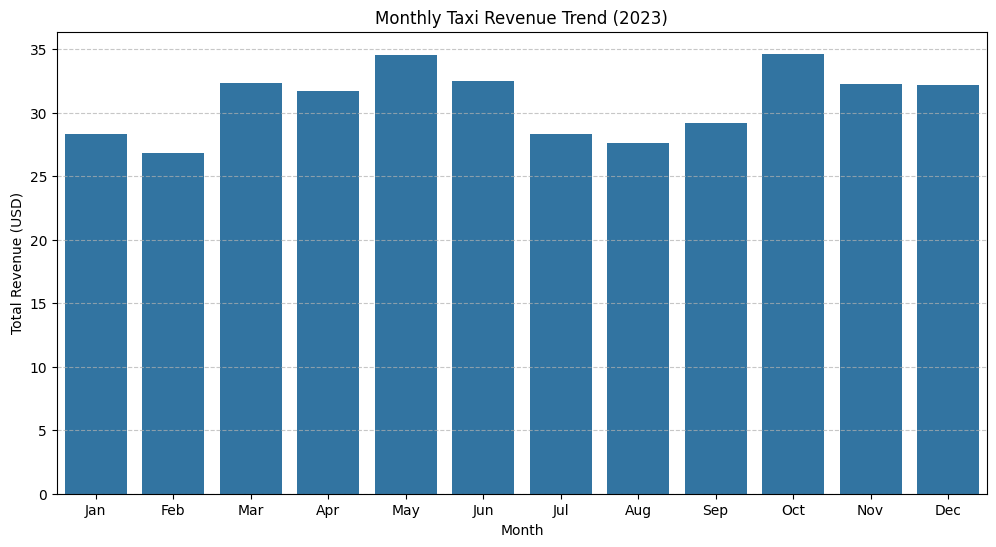

In [61]:
# Group data by month and analyse monthly revenue

if 'tpep_pickup_datetime' not in df.columns:
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

if 'pickup_month' not in df.columns:
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_revenue.index = monthly_revenue.index.map(lambda x: month_names[x-1])

print("Monthly Revenue Trend :\n")

# Visualize the monthly revenue trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Taxi Revenue Trend (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue Proportion (2023):

pickup_quarter
1    23.61%
2    26.68%
3    22.97%
4    26.74%
Name: total_amount, dtype: object


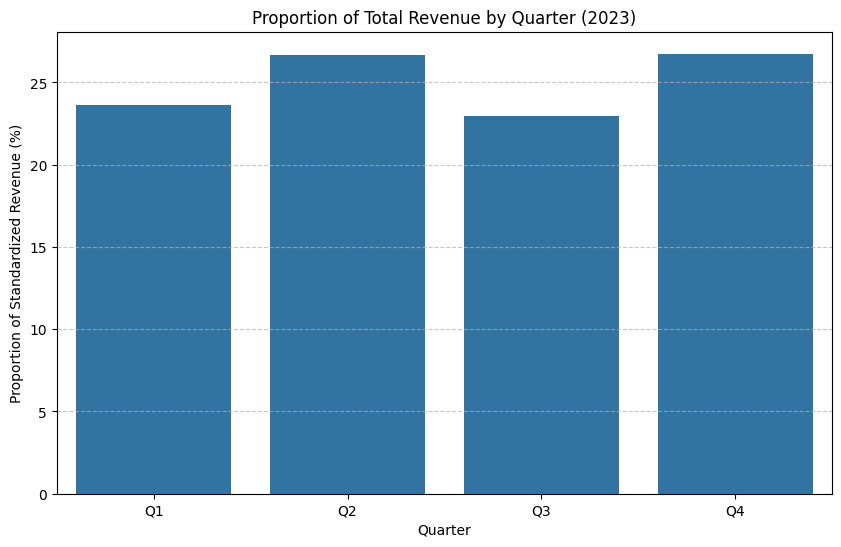

In [62]:
# Calculate proportion of each quarter

if 'tpep_pickup_datetime' not in df.columns:
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter


quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()

total_annual_revenue = quarterly_revenue.sum()

if total_annual_revenue != 0:
    quarterly_revenue_proportion = (quarterly_revenue / total_annual_revenue) * 100
    print("Quarterly Revenue Proportion (2023):\n")
    print(quarterly_revenue_proportion.map('{:.2f}%'.format))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=quarterly_revenue_proportion.index.map(lambda x: f'Q{x}'), y=quarterly_revenue_proportion.values)
    plt.title('Proportion of Total Revenue by Quarter (2023)')
    plt.xlabel('Quarter')
    plt.ylabel('Proportion of Standardized Revenue (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Cannot calculate meaningful proportions as total annual standardized revenue is zero.")


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

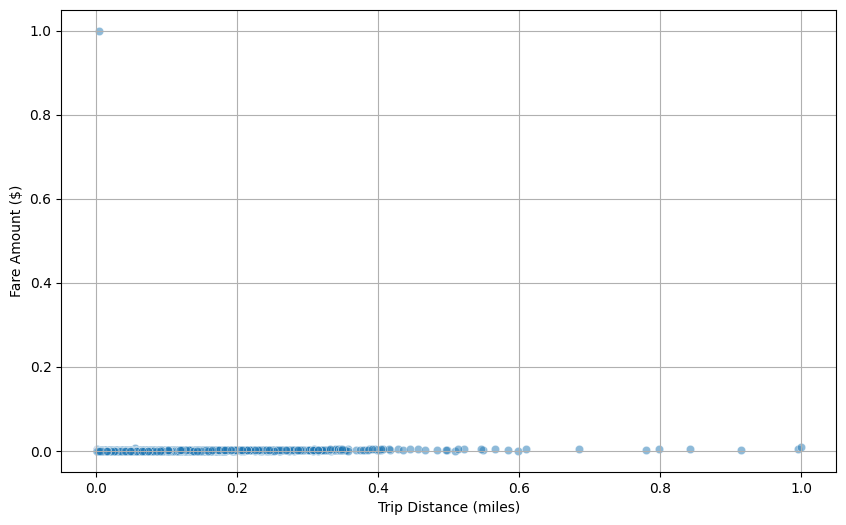

Correlation between trip distance and fare amount (excluding zero distance trips): 0.16


In [63]:
# Show how trip fare is affected by distance

filtered_df = df[df['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df, alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount (excluding zero distance trips): {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

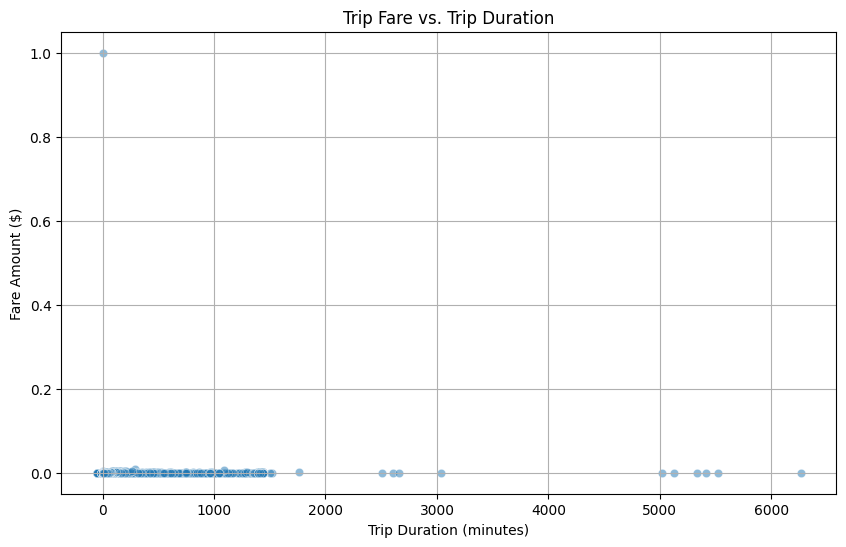

Correlation between trip duration and fare amount: 0.04


In [64]:
# Show relationship between fare and trip duration

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.5)  # Added alpha for better visibility
plt.title('Trip Fare vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")

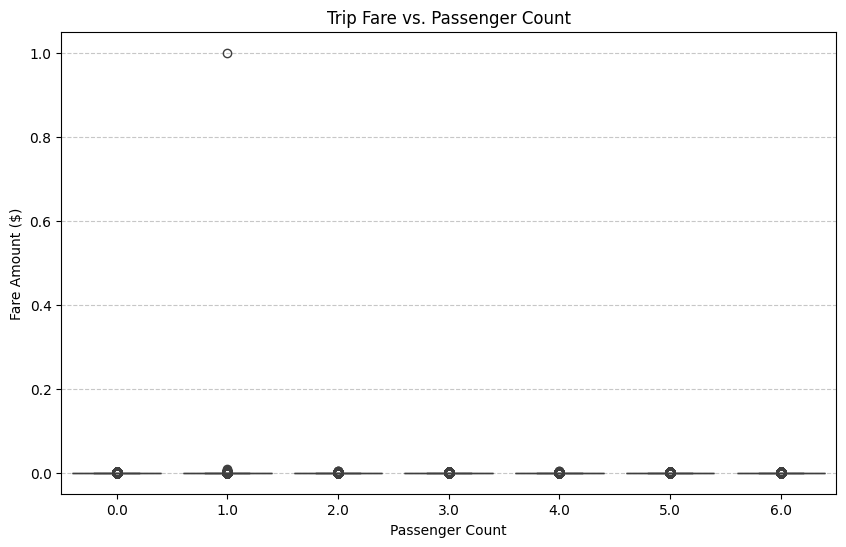

Correlation between passenger count and fare amount: 0.01


In [65]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Trip Fare vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")

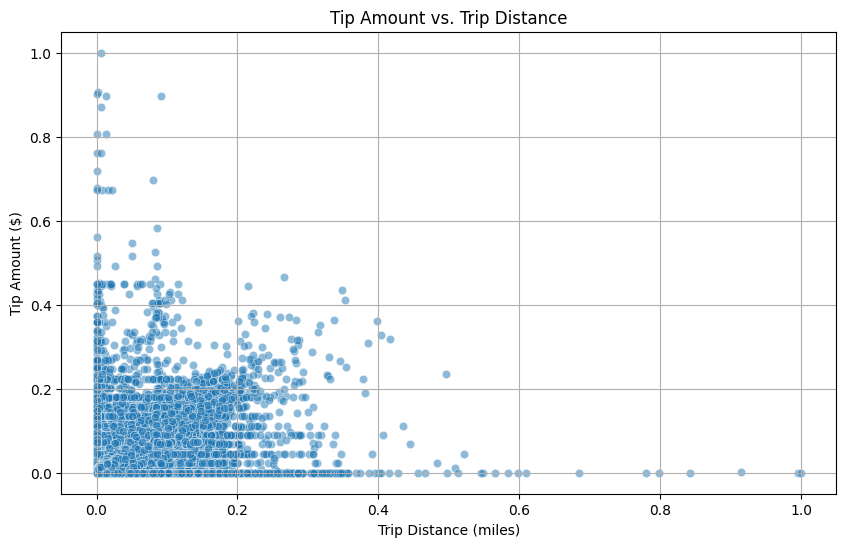

Correlation between trip distance and tip amount: 0.57


In [66]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.5)  # Added alpha for better visibility
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

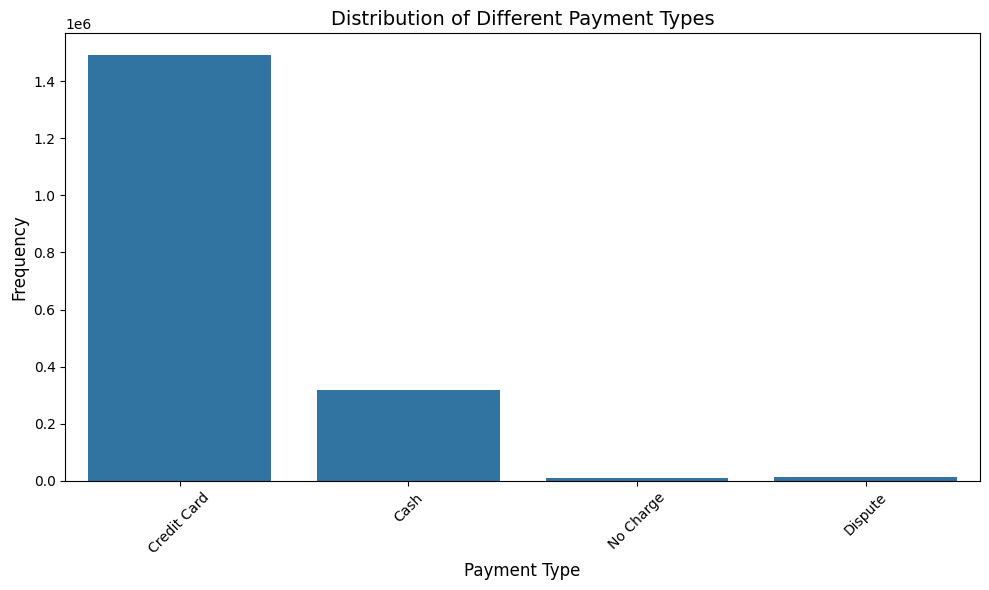

payment_type
1    81.48
2    17.28
3     0.49
4     0.75
Name: count, dtype: float64


In [67]:
# Analyse the distribution of different payment types (payment_type).
all_payment_types = [1, 2, 3, 4, 5, 6]
payment_type_labels = ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown', 'Voided Trip']
payment_type_counts = df['payment_type'].value_counts().reindex(all_payment_types, fill_value=0)
payment_df = pd.DataFrame({
    'Type': payment_type_labels,
    'Count': payment_type_counts.values
})
payment_df = payment_df[payment_df['Count'] > 0]
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

payment_type_percentage = (payment_type_counts / payment_type_counts.sum()) * 100
non_zero_percentages = payment_type_percentage[payment_type_percentage > 0]
print(non_zero_percentages.round(2))



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [68]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [69]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

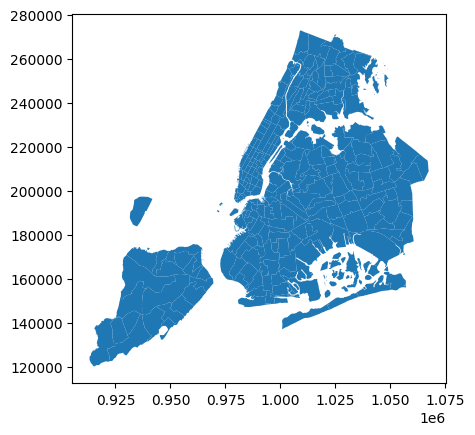

In [70]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [71]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the merged DataFrame
merged_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,pickup_quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,0.037782,1.0,N,138,256,2,...,1,1,15.950000,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,0.006053,1.0,N,161,237,1,...,1,1,5.083333,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,0.007029,1.0,N,237,141,2,...,1,1,10.550000,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.002636,1.0,N,143,142,2,...,1,1,5.416667,143.0,0.054180,0.000151,Lincoln Square West,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,0.034658,1.0,N,246,37,1,...,1,1,33.616667,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [72]:
# Group data by location and calculate the number of trips
# Group data by pickup location (PULocationID) and count trips
trip_counts = df.groupby('PULocationID').size().reset_index(name='num_trips')

# Display the result
trip_counts.head()  # Show the first few rows


,PULocationID,num_trips
0,1,214
1,2,2
2,3,40
3,4,1861
4,5,13


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [73]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = pd.merge(zones, trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Display the merged GeoDataFrame
zones_with_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,214.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,40.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1861.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

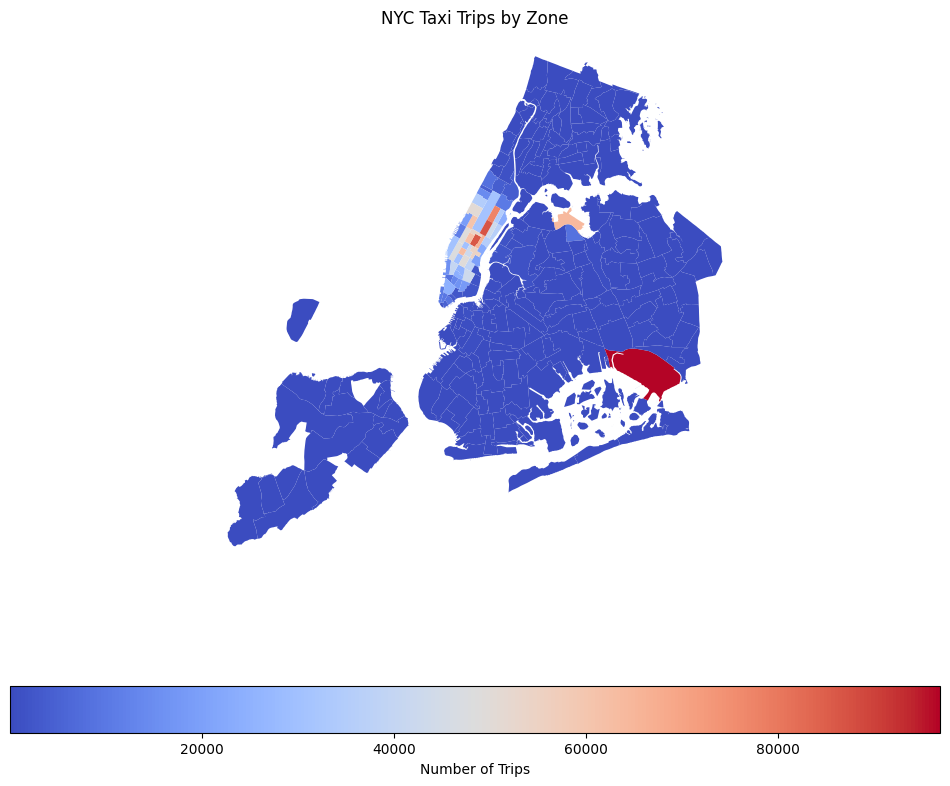

In [74]:
# Define figure and axis
# Plot the map and display it
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    },
    cmap='coolwarm'
)

ax.set_title("NYC Taxi Trips by Zone")
plt.axis('off')
plt.show()





In [75]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_trips_sorted = zones_with_trips.sort_values(by='num_trips', ascending=False)
zones_with_trips_sorted.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,96827.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,86905.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,85948.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,77517.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,65634.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [76]:
# Find routes which have the slowest speeds at different times of the day
df_route = df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
df_route['trip_duration_hrs'] = (df_route['tpep_dropoff_datetime'] - df_route['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_route = df_route[(df_route['trip_duration_hrs'] > 0) & (df_route['trip_distance'] > 0)]
df_route['pickup_hour'] = df_route['tpep_pickup_datetime'].dt.hour
grouped = df_route.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
speed_data = grouped.agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()
speed_data['avg_speed_mph'] = speed_data['trip_distance'] / speed_data['trip_duration_hrs']
slowest_routes = speed_data.sort_values(by='avg_speed_mph').head(10)
print(slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph']])


        PULocationID  DOLocationID  pickup_hour  avg_speed_mph
102294           232            65           13       0.000026
114929           243           264           17       0.000038
61252            142           142            5       0.000116
120428           258           258            1       0.000128
33393            100             7            8       0.000193
6451              40            65           21       0.000229
39490            113           235           22       0.000235
89226            194           194           16       0.000239
95261            226           145           18       0.000253
9705              45            45           10       0.000290


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

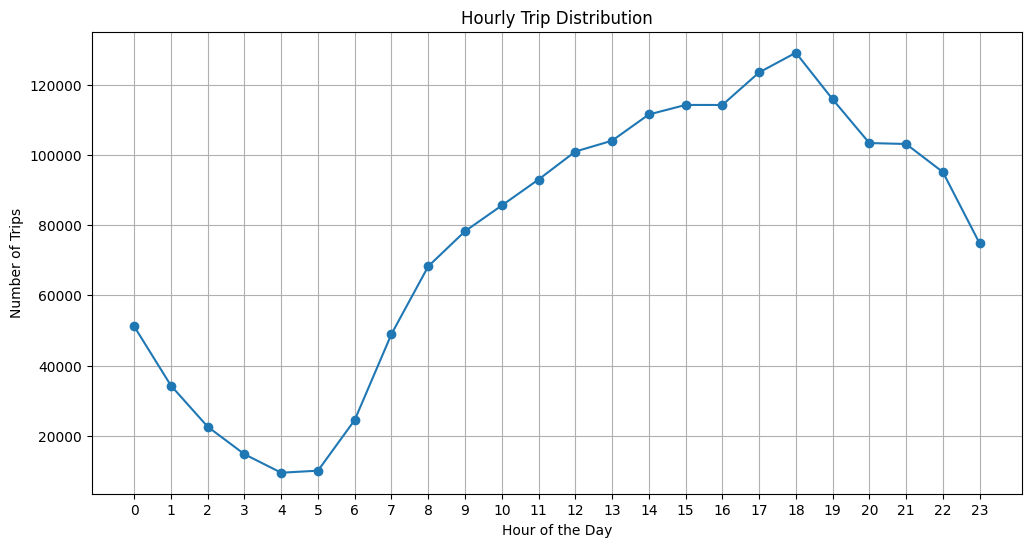

Busiest hour: 18
Number of trips during busiest hour: 129190


In [77]:
# Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trips = df.groupby('pickup_hour')['tpep_pickup_datetime'].count().reset_index(name='trip_count')
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]

plt.figure(figsize=(12, 6))
plt.plot(hourly_trips['pickup_hour'], hourly_trips['trip_count'], marker='o')
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()
print(f"Busiest hour: {busiest_hour['pickup_hour']}")
print(f"Number of trips during busiest hour: {busiest_hour['trip_count']}")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [80]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05


top5_busiest_hours = hourly_trips.sort_values(by='trip_count', ascending=False).head(5)

# Scale up the trip counts
scaled_top5_busiest_hours = (top5_busiest_hours['trip_count'] / sample_fraction).astype(int)

print("Top 5 busiest hours (scaled up to actual trip counts):")
result_df = pd.DataFrame({'Hour': top5_busiest_hours['pickup_hour'], 'Actual Trip Count': scaled_top5_busiest_hours})
print(result_df)


Top 5 busiest hours (scaled up to actual trip counts):
    Hour  Actual Trip Count
18    18            2583800
17    17            2471260
19    19            2318400
15    15            2286020
16    16            2285780


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

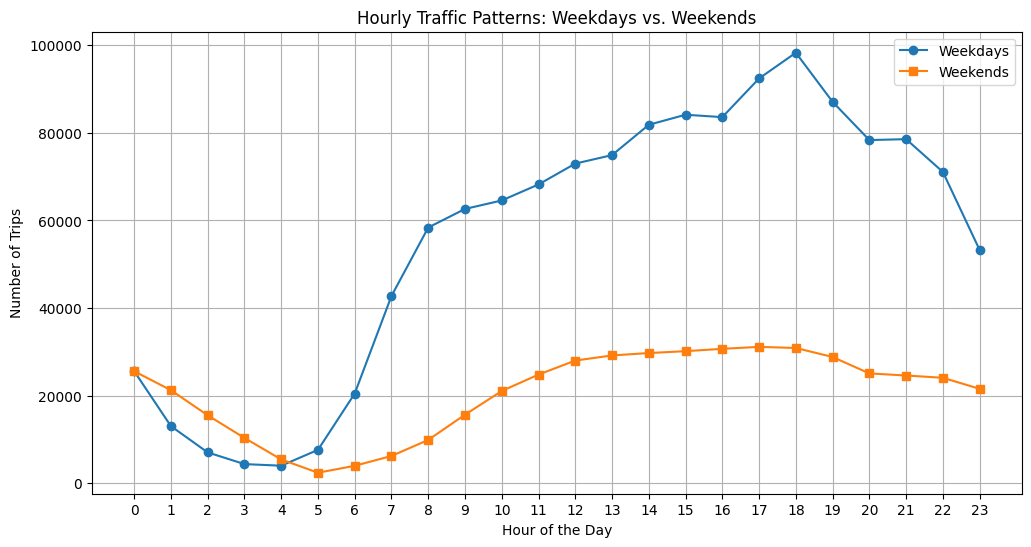

In [81]:
# Compare traffic trends for the week days and weekends

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
weekdays_df = df[df['day_of_week'] < 5]  # Monday to Friday
weekends_df = df[df['day_of_week'] >= 5]  # Saturday and Sunday
weekday_hourly_counts = weekdays_df.groupby(weekdays_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()
weekend_hourly_counts = weekends_df.groupby(weekends_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='s')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [82]:
# Find top 10 pickup and dropoff zones
top_pu = df['PULocationID'].value_counts().head(10).reset_index()
top_pu.columns = ['LocationID', 'Pickup_Trips']

# Merge with zones to get zone names
top_pu = top_pu.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones:")
top_pu


Top 10 Pickup Zones:


,LocationID,Pickup_Trips,zone
0,132,96827,JFK Airport
1,237,86905,Upper East Side South
2,161,85948,Midtown Center
3,236,77517,Upper East Side North
4,162,65634,Midtown East
5,138,64177,LaGuardia Airport
6,186,63471,Penn Station/Madison Sq West
7,230,61315,Times Sq/Theatre District
8,142,60887,Lincoln Square East
9,170,54493,Murray Hill


In [83]:
top_do = df['DOLocationID'].value_counts().head(10).reset_index()
top_do.columns = ['LocationID', 'Dropoff_Trips']

# Merge with zones to get zone names
top_do = top_do.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Dropoff Zones:")
top_do

Top 10 Dropoff Zones:


,LocationID,Dropoff_Trips,zone
0,236,81269,Upper East Side North
1,237,77558,Upper East Side South
2,161,71647,Midtown Center
3,230,56398,Times Sq/Theatre District
4,170,54314,Murray Hill
5,162,52248,Midtown East
6,142,51494,Lincoln Square East
7,239,51260,Upper West Side South
8,141,48449,Lenox Hill West
9,68,46352,East Chelsea


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [85]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
ratios['pickup_dropoff_ratio'] = ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan)
ratios = ratios.reset_index().rename(columns={'index': 'LocationID'})
ratios = ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
ratios = ratios.set_index('zone')
pickup_dropoff_ratios = ratios['pickup_dropoff_ratio']
top_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values(ascending=False).head(10)
bottom_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values().head(10)
top_pickup_dropoff_ratio

,pickup_dropoff_ratio
zone,
East Elmhurst,8.320717
JFK Airport,4.617626
LaGuardia Airport,2.884489
Penn Station/Madison Sq West,1.582187
Central Park,1.374760
Greenwich Village South,1.374743
West Village,1.326222
Midtown East,1.256201
Midtown Center,1.199604


In [86]:
bottom_pickup_dropoff_ratio

,pickup_dropoff_ratio
zone,
Freshkills Park,0.000000
Broad Channel,0.000000
West Brighton,0.000000
Oakwood,0.000000
Breezy Point/Fort Tilden/Riis Beach,0.025641
Stapleton,0.029412
Windsor Terrace,0.038259
Newark Airport,0.040233
Grymes Hill/Clifton,0.043478


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [87]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'pickup_zone'}),
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'dropoff_zone'}),
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)
top_night_pickups = night_df.groupby('pickup_zone')['PULocationID'].count().sort_values(ascending=False).head(10)
top_night_dropoffs = night_df.groupby('dropoff_zone')['DOLocationID'].count().sort_values(ascending=False).head(10)

In [88]:
top_night_pickups

,PULocationID
pickup_zone,
East Village,15339
JFK Airport,13399
West Village,12352
Clinton East,9797
Lower East Side,9535
Greenwich Village South,8720
Times Sq/Theatre District,7776
Penn Station/Madison Sq West,6233
Midtown South,5962


In [89]:
top_night_dropoffs

,DOLocationID
dropoff_zone,
East Village,8239
Clinton East,6641
Murray Hill,6085
Gramercy,5627
East Chelsea,5551
Lenox Hill West,5122
West Village,4896
Yorkville West,4878
Lower East Side,4321


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [90]:
# Filter for night hours (11 PM to 5 AM)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

nighttime_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]  # 11 PM - 5 AM
daytime_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]  # 6 AM - 10 PM

nighttime_revenue = nighttime_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()

total_revenue = df['total_amount'].sum()

nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")


Nighttime Revenue Share: 12.06%
Daytime Revenue Share: 87.94%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [91]:
# Analyse the fare per mile per passenger for different passenger counts
valid_fares = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
valid_fares['fare_per_mile_per_passenger'] = valid_fares['total_amount'] / (valid_fares['trip_distance'] * valid_fares['passenger_count'])
avg_fare_by_passenger = valid_fares.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
avg_fare_by_passenger



/tmp/ipython-input-2475484573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_fares['fare_per_mile_per_passenger'] = valid_fares['total_amount'] / (valid_fares['trip_distance'] * valid_fares['passenger_count'])


,fare_per_mile_per_passenger
passenger_count,
1.0,0.024175
2.0,0.013309
3.0,0.008308
4.0,0.008498
5.0,0.003936
6.0,0.003173


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [92]:
# Compare the average fare per mile for different days and for different times of the day
valid_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]

valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()
valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour

valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance']

fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().round(2)

fare_by_hour = valid_df.groupby('hour_of_day')['fare_per_mile'].mean().round(2)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(ordered_days)


/tmp/ipython-input-2994921401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()
/tmp/ipython-input-2994921401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour
/tmp/ipython-input-2994921401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [93]:
fare_by_day

,fare_per_mile
day_of_week,
Monday,0.02
Tuesday,0.03
Wednesday,0.02
Thursday,0.02
Friday,0.02
Saturday,0.02
Sunday,0.03


In [94]:
fare_by_hour

,fare_per_mile
hour_of_day,
0,0.02
1,0.02
2,0.02
3,0.02
4,0.03
5,0.03
6,0.02
7,0.02
8,0.02


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

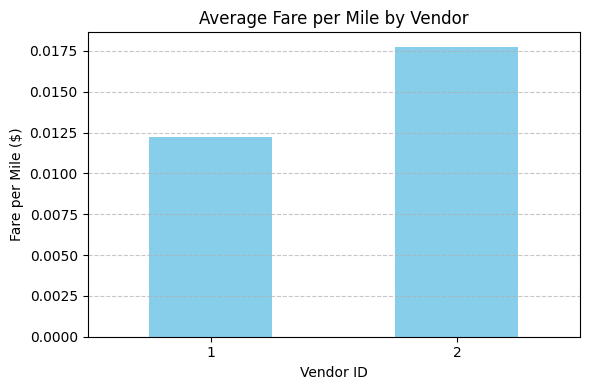

In [95]:
# Compare fare per mile for different vendors

df_vendor = df[df['trip_distance'] > 0].copy()

df_vendor['fare_per_mile'] = df_vendor['fare_amount'] / df_vendor['trip_distance']

vendor_fare_comparison = df_vendor.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare_comparison.plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


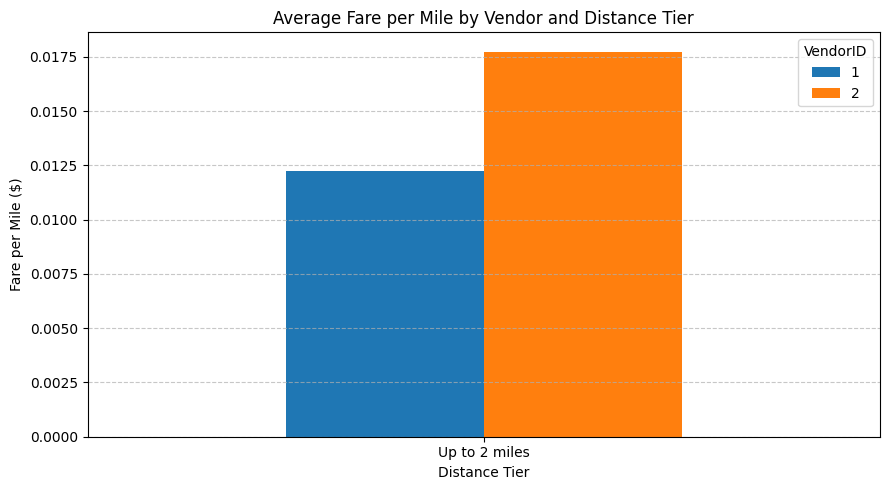

In [96]:
# Defining distance tiers

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]  # Avoid division by zero

tier1 = df[df['trip_distance'] <= 2].copy()
tier2 = df[(df['trip_distance'] > 2) & (df['trip_distance'] <= 5)].copy()
tier3 = df[df['trip_distance'] > 5].copy()

tier1['distance_tier'] = 'Up to 2 miles'
tier2['distance_tier'] = '2 to 5 miles'
tier3['distance_tier'] = 'More than 5 miles'

tiered_data = pd.concat([tier1, tier2, tier3])

avg_fare_by_tier = tiered_data.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()

avg_fare_by_tier.plot(kind='bar', figsize=(9, 5))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [97]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100  # Avoid division by zero

tips_df = df[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'pickup_hour', 'tip_percentage']].copy()

tips_df['hour'] = tips_df['pickup_hour']

tips_df['distance_category'] = pd.cut(
    tips_df['trip_distance'], [0, 2, 5, float('inf')],
    labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
)

tips_df['passenger_category'] = pd.cut(
    tips_df['passenger_count'], [0, 1, 3, float('inf')],
    labels=['1 passenger', '2-3 passengers', '4+ passengers']
)

tips_df['time_category'] = pd.cut(
    tips_df['hour'], [0, 6, 12, 18, 24],
    labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'],
    right=False
)

print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('time_category')['tip_percentage'].mean())

low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]
print("\nMost Common Low Tip Scenarios:")
print(low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category'])
                     .size()
                     .sort_values(ascending=False)
                     .head(10))
distance_bins = [0, 1, 2, 5, 10, 20, 50]
tips_df['distance_bin'] = pd.cut(tips_df['trip_distance'], bins=distance_bins)

tip_by_distance = tips_df.groupby('distance_bin')['tip_percentage'].mean()

/tmp/ipython-input-4290538250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100  # Avoid division by zero


Average Tip Percentage by Distance:
distance_category
Up to 2 miles        7676.350688
2 to 5 miles                 NaN
More than 5 miles            NaN
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:


/tmp/ipython-input-4290538250.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips_df.groupby('distance_category')['tip_percentage'].mean())
/tmp/ipython-input-4290538250.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips_df.groupby('passenger_category')['tip_percentage'].mean())


passenger_category
1 passenger       7762.079995
2-3 passengers    7462.690167
4+ passengers     7236.778000
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_category
Midnight to 6 AM    7434.382746
6 AM to Noon        7585.160093
Noon to 6 PM        7562.828478
6 PM to Midnight    7911.194588
Name: tip_percentage, dtype: float64


/tmp/ipython-input-4290538250.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips_df.groupby('time_category')['tip_percentage'].mean())



Most Common Low Tip Scenarios:
distance_category  passenger_category  time_category   
Up to 2 miles      1 passenger         Noon to 6 PM        110058
                                       6 PM to Midnight     80830
                                       6 AM to Noon         70189
                   2-3 passengers      Noon to 6 PM         34091
                                       6 PM to Midnight     27288
                   1 passenger         Midnight to 6 AM     23999
                   2-3 passengers      6 AM to Noon         15073
                   4+ passengers       Noon to 6 PM          8455
                                       6 PM to Midnight      6563
                   2-3 passengers      Midnight to 6 AM      6311
dtype: int64


/tmp/ipython-input-4290538250.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category'])
/tmp/ipython-input-4290538250.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = tips_df.groupby('distance_bin')['tip_percentage'].mean()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [98]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df['tip_percent'] = (df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100  # Avoid division by zero

low_tip = df[df['tip_percent'] < 10].copy()
high_tip = df[df['tip_percent'] > 25].copy()

comparison = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])

print("Average Comparison Between Low and High Tip Trips:")
print(comparison.round(2))

/tmp/ipython-input-48793090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tip_percent'] = (df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100  # Avoid division by zero


Average Comparison Between Low and High Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              0.02             0.02
Avg Passenger Count            1.42             1.36
Avg Fare Amount                0.00             0.00
Avg Tip Amount                 0.00             0.02


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

/tmp/ipython-input-2591584948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
/tmp/ipython-input-2591584948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek


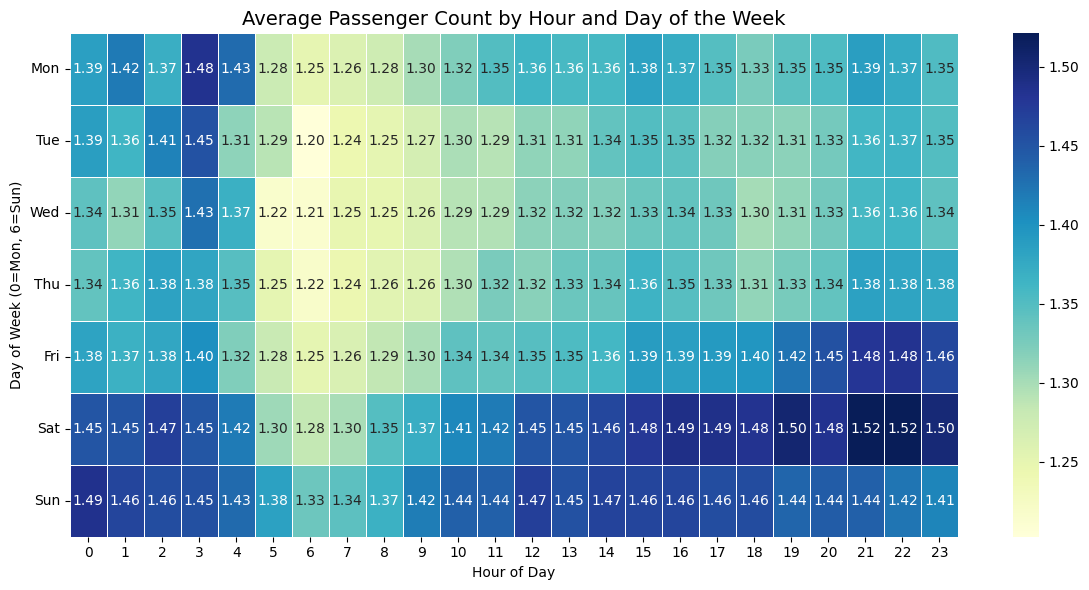

In [99]:
# See how passenger count varies across hours and days

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

passenger_variation = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

/tmp/ipython-input-2374898666.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Blues_d')


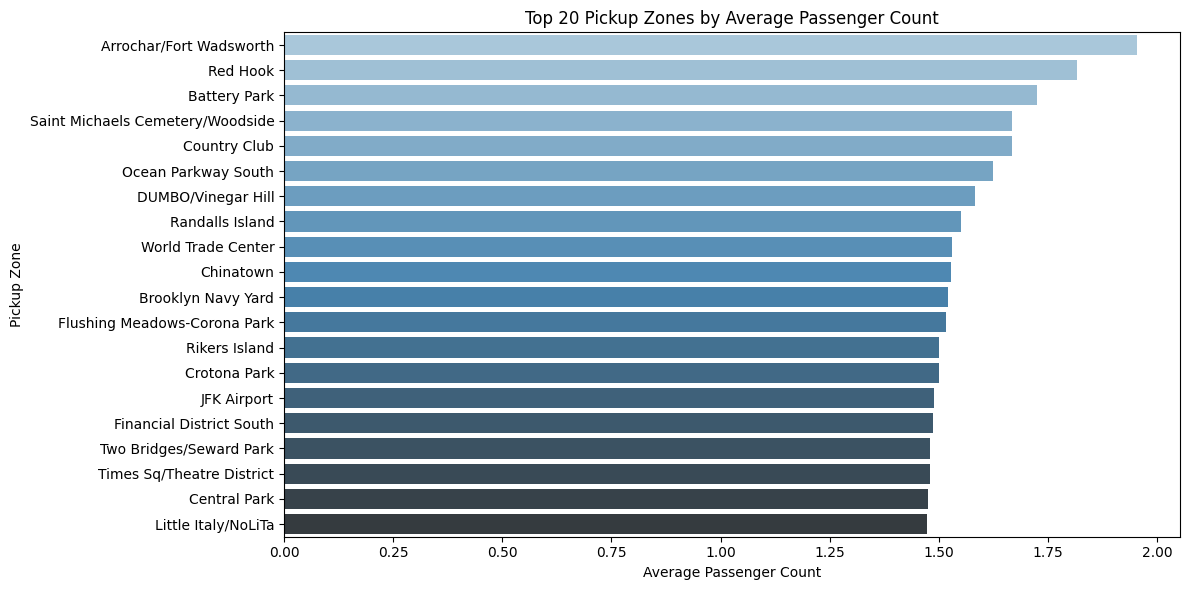

In [100]:
# How does passenger count vary across zones
zone_passenger_avg = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_avg = zone_passenger_avg.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

zone_passenger_avg = zone_passenger_avg.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Blues_d')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()


In [101]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID_x,num_trips,PULocationID_y,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,214.0,1.0,1.319149
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0,2.0,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,40.0,3.0,1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1861.0,4.0,1.415105
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0,5.0,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharge Application (%):
extra                    62.312583
mta_tax                  99.357465
tip_amount               78.127946
tolls_amount              8.095659
improvement_surcharge    99.990323
congestion_surcharge     92.915310
airport_fee               8.782154
dtype: float64


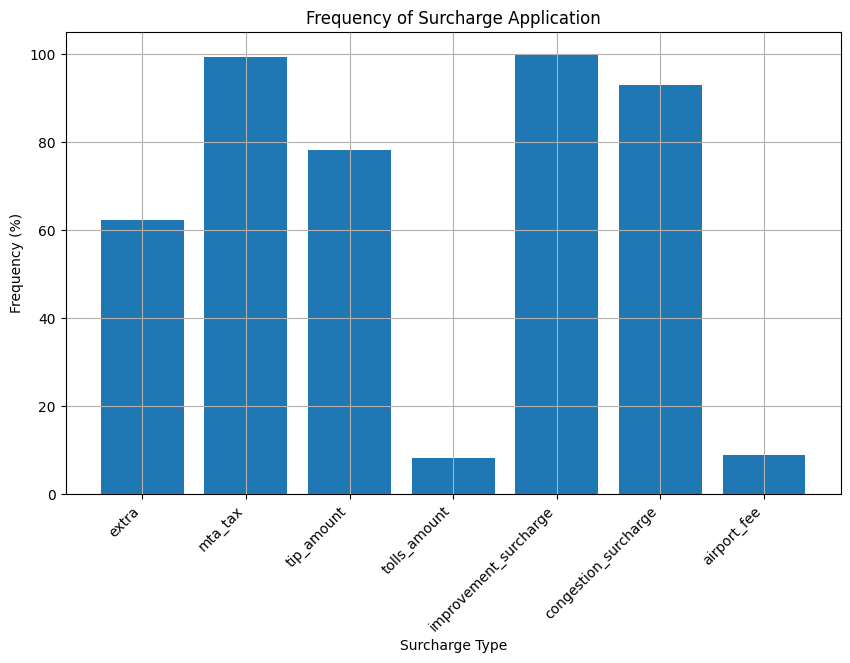

In [103]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

surcharge_frequency = df[surcharge_cols].astype(bool).sum() / len(df) * 100

print("Frequency of Surcharge Application (%):")
print(surcharge_frequency)

plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency.index, surcharge_frequency.values)
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on the demand patterns and identified operational inefficiencies, here are recommendations to optimize routing and dispatching:

Optimize Fleet Deployment for Peak Demand: Leverage the hourly, daily, and monthly pickup trends to dynamically adjust fleet deployment. Increase cab availability during peak hours (e.g., 5 PM-7 PM, with 6 PM being the busiest) and peak days (Tuesday-Friday). For months with highest activity (March, May, October), ensure maximum driver presence in high-demand zones like JFK Airport, Midtown Center, and Upper East Side.

Tailor Dispatching for Weekday vs. Weekend Patterns: Implement distinct dispatching strategies for weekdays versus weekends. During weekdays, prioritize routes and areas catering to morning and evening commutes. On weekends, shift focus to entertainment districts and areas with observed late-night surges. This adaptive approach ensures cabs are where demand is highest based on the day-specific patterns.

Mitigate Bottlenecks on Slow Routes: Integrate data on the 'slowest routes' (specific origin-destination pairs at particular hours) into the dispatching system. For example, during 1 PM, if a route between PULocationID 232 and DOLocationID 65 is identified as extremely slow, the system should actively suggest alternative routes or divert drivers away from these congested paths to maintain efficiency and reduce trip times.

Strategic Positioning for Imbalanced Zones: Address zones with high pickup-to-dropoff ratios (e.g., JFK Airport, LaGuardia Airport, East Elmhurst) and low ratios (e.g., Freshkills Park, Ridgewood). For high-ratio zones, consider incentives for drivers to await return trips or position idle cabs. For low-ratio zones, minimize deadhead miles by guiding drivers towards denser areas after drop-offs.

Night-Time Demand Management: Although night hours (11 PM - 5 AM) contribute a smaller share to overall revenue, specific zones like East Village, JFK Airport, and West Village exhibit significant pickup activity. Ensure a targeted supply of cabs in these hotspots during these hours, potentially through surge pricing or special incentives for night-shift drivers, to capture consistent demand.

Match Vehicle Capacity to Passenger Count by Zone: While the average passenger count is generally around 1-2, certain zones might consistently show higher average passenger counts. In such zones, especially during peak times, prioritize dispatching larger vehicles (if applicable) to optimize passenger capacity and revenue per trip.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Below are few suggestions on strategically positioning cabs across different time zones:

Temporal Calibration: Synchronize deployment with peak commute windows, overnight surges, and seasonal demand fluctuations.

 Contextual Dispatching: Prioritize commercial hubs during the work week and shift focus to leisure and residential districts on weekends.

 Geographic Optimization: Focus resources on high-volume corridors and utilize rebalancing techniques to correct pickup/drop-off imbalances.

 Analytical Precision: Integrate real-time telemetry and predictive modeling to guide dynamic vehicle placement.

 Stakeholder Integration: Maintain active driver communication and coordinate with urban planners to streamline operations.

Technical Infrastructure: Utilize GPS-enabled heatmaps and centralized dashboards for continuous performance monitoring.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Based on the data, here are several ways to improve  pricing strategy to increase revenue and stay competitive:

Use Surge Pricing During Busy Times : Raise prices when demand is highest. Our data shows that the busiest times are between 3 PM and 8 PM (peaking at 6 PM), on Tuesdays through Fridays, and during the months of March, May, and October. Charging more during these windows helps us capture more revenue when people need rides the most.

Adjust Fares Based on Distance:Short Trips: Data shows a competitor (Vendor 2) is successfully charging more per mile for short trips (under 2 miles) than we are. We have room to raise these prices.
Long Trips: Customers tend to tip better on longer rides, showing they value the service. We can fine-tune our rates for medium and long distances to find the "sweet spot" for profit.

Be Clear About Fees :Most rides include standard taxes and congestion fees, but things like tolls and airport fees happen less often. We should clearly list every charge on the receipt. Being transparent builds customer trust and prevents arguments over the final price.

Encourage Better Tipping: Short, solo trips during off-peak hours usually get the lowest tips. To help drivers earn more, we can use "smart" app prompts that suggest tip amounts based on the time of day and trip length, rather than just a flat percentage.

Watch the Competition:We need to keep a close eye on what Vendor 1 and Vendor 2 are charging. If they are charging more than us for certain types of rides without losing customers, we should raise our prices too. If they drop their prices, we may need to lower ours to keep our customers.